In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pickle


nDivisionsXY = 336
sLength = 83.5
number_of_events = 3000
ENERGY = 1 # GeV

def calcEventsMesh(baseDir:str, xhit, yhit):


    try:
        with open(baseDir+f"/gamma_{ENERGY}GeV_{xhit},{yhit}.pkl", "rb") as pickle_f:

            mesh = pickle.load(pickle_f)

    except FileNotFoundError:

        mesh = np.zeros((number_of_events, nDivisionsXY, nDivisionsXY))

        for enNum in range(number_of_events):

            with open(baseDir+f"/{xhit},{yhit}/evnt_{enNum}_gamma_{ENERGY}GeV_{xhit},{yhit}.txt") as fileEdep:

                fileEdep.readline() # skip 3 firts lines
                fileEdep.readline()
                fileEdep.readline()

                for line in fileEdep:
                    lineSplit = line.split(",")

                    ix = int(lineSplit[0])
                    iy = int(lineSplit[1])

                    eDep = float(lineSplit[3])

                    mesh[enNum, ix, iy] += eDep

        pickle_f_name = baseDir+f"/gamma_{ENERGY}GeV_{xhit},{yhit}.pkl"
        print("Creating new pickle file", pickle_f_name)

        with open(pickle_f_name, "wb") as pickle_f:

            pickle.dump(mesh, pickle_f)

    return mesh


# def calcEventsMesh(baseDir:str, xhit, yhit): # FIXME: debuging

#     mesh = np.zeros((number_of_events, nDivisionsXY, nDivisionsXY))



#     for enNum in range(number_of_events):

#         ix = [167+xhit*2, 167+xhit*2, 168+xhit*2, 168+xhit*2]
#         iy = [167+yhit*2, 168+yhit*2, 167+yhit*2, 168+yhit*2]

#         mesh[enNum, ix, iy] = ENERGY*1000/4


#     return mesh

In [15]:
meshs_dict = {}

for i in range(4):
    for j in range(0,i+1):

        key = f"X={i},Y={j}"

        print(key)

        meshs_dict[key] = calcEventsMesh("build/eDepMaps", i,j)


        # make zero deposited energy in the position of fibers


        idxs1 = np.arange(6,336, 14)
        idxs2 = np.arange(7,336, 14)
        idxs = np.concatenate([idxs1, idxs2], axis=0)

        idxs_x, idxs_y = np.meshgrid(idxs, idxs)

        idxs_x = idxs_x.flatten()
        idxs_y = idxs_y.flatten()

        meshs_dict[key][:,idxs_x,idxs_y] = 0

        # croup bins an the edghe and combine four bins into one

        meshs_dict[key] = meshs_dict[key][:,1:-1,1:-1]

        meshs_dict[key] = meshs_dict[key][:,0::2, 0::2] + meshs_dict[key][:,1::2, 0::2] +\
                          meshs_dict[key][:,0::2, 1::2] + meshs_dict[key][:,1::2, 1::2]
                

X=0,Y=0
X=1,Y=0
X=1,Y=1
X=2,Y=0
X=2,Y=1
X=2,Y=2
X=3,Y=0
X=3,Y=1
X=3,Y=2
X=3,Y=3


Text(0.05, 0.01, 'Mean (over events)\ndeposited energy\nis 965.80 MeV')

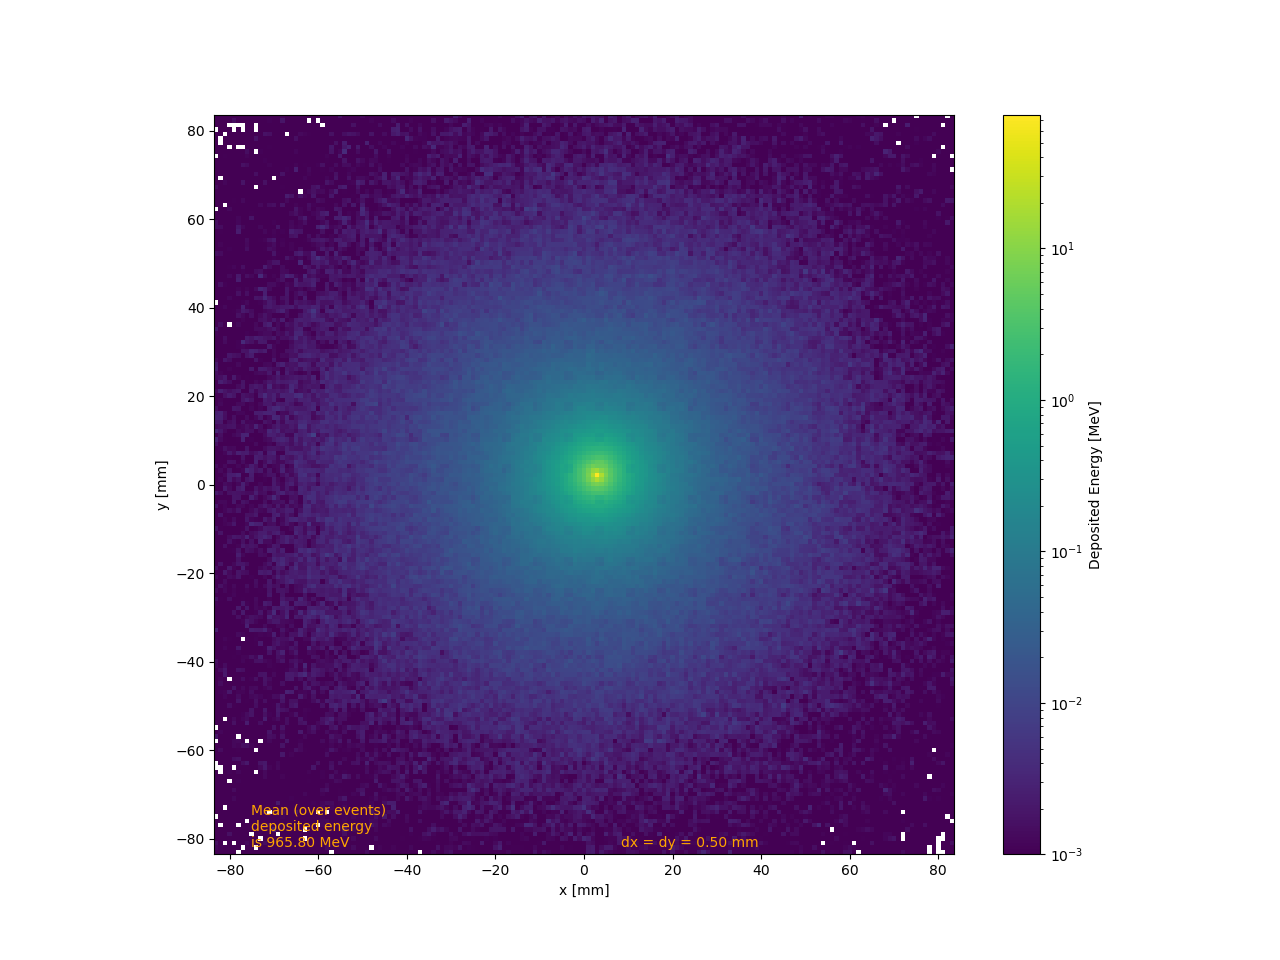

In [17]:
%matplotlib widget

mesh = meshs_dict["X=3,Y=2"]

mesh = np.mean(mesh, axis=0)

eDepMean = np.sum(mesh)

#################################
## eDep plots
#################################
plt.figure(figsize=(2*6.4, 2*4.8))
plt.imshow(np.transpose(mesh)[::-1,:], extent=(-sLength, sLength, -sLength, sLength), norm=colors.LogNorm(vmin=1e-3))
cbar = plt.colorbar()
cbar.ax.set_ylabel("Deposited Energy [MeV]")
plt.xlabel("x [mm]")
plt.ylabel("y [mm]")
ax = plt.gca()
ax.text(0.55, 0.01, "dx = dy = {:.2f} mm".format(sLength*2/nDivisionsXY), transform=ax.transAxes, color="orange")
ax.text(0.05, 0.01, "Mean (over events)\ndeposited energy\nis {:.2f} MeV".format(eDepMean),
                transform=ax.transAxes, color="orange")

### The light-gathering efficiency maps, based on numbers kingly provided by Herve

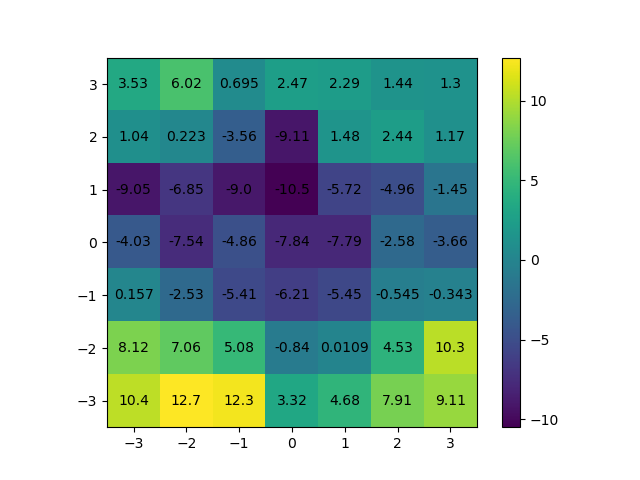

In [18]:
MAP0 = [[-1.00e+02,  1.09e+01,  2.00e-01, -3.14e+00, -9.17e-01,  1.72e+00, -1.00e+02],
        [ 8.49e+00,  5.10e+00, -3.66e-03, -2.05e+00, -4.44e+00,  3.00e+00,  1.99e+00],
        [ 5.25e+00,  5.55e-01, -4.94e+00, -7.29e+00, -5.21e+00,  2.03e+00,  2.84e+00],
        [ 3.89e+00, -3.00e-01, -5.70e+00, -7.33e+00, -1.00e+01, -8.62e+00,  3.03e+00],
        [ 1.29e+01,  5.65e+00, -4.89e+00, -4.34e+00, -8.50e+00, -3.03e+00,  1.24e+00],
        [ 1.33e+01,  7.64e+00, -2.00e+00, -7.04e+00, -6.35e+00,  7.68e-01,  6.59e+00],
        [-1.00e+02,  8.71e+00,  7.03e-01, -3.51e+00, -8.56e+00,  1.59e+00, -1.00e+02]]

MAPCorner0 = [[ 9.11e+00,  1.03e+01, -3.43e-01, -3.66e+00, -1.45e+00,  1.17e+00,  1.30e+00],
              [ 7.91e+00,  4.53e+00, -5.45e-01, -2.58e+00, -4.96e+00,  2.44e+00,  1.44e+00],
              [ 4.68e+00,  1.09e-02, -5.45e+00, -7.79e+00, -5.72e+00,  1.48e+00,  2.29e+00],
              [ 3.32e+00, -8.40e-01, -6.21e+00, -7.84e+00, -1.05e+01, -9.11e+00,  2.47e+00],
              [ 1.23e+01,  5.08e+00, -5.41e+00, -4.86e+00, -9.00e+00, -3.56e+00,  6.95e-01],
              [ 1.27e+01,  7.06e+00, -2.53e+00, -7.54e+00, -6.85e+00,  2.23e-01,  6.02e+00],
              [ 1.04e+01,  8.12e+00,  1.57e-01, -4.03e+00, -9.05e+00,  1.04e+00,  3.53e+00]]

MAPDebug = [[3, 3, 8, 6, 0, 8, 4],
            [1, 3, 7, 5, 0, 8, 4],
            [8, 1, 8, 6, 0, 8, 4],
            [5, 3, 1, 0, 1, 5, 4],
            [8, 3, 0, 6, 8, 1, 4],
            [7, 3, 0, 5, 7, 4, 1],
            [3, 0, 8, 6, 8, 7, 4]]

# this not suppose to change final result,
# but make visualsation of maps the same as
# in Herve's presentation
MAP0 = MAP0[::-1]
MAPCorner0 = MAPCorner0[::-1]
MAPDebug = MAPDebug[::-1]

wights_map_1cell = MAPCorner0

plt.figure(figsize=(6.4, 4.8))
plt.imshow(np.transpose(wights_map_1cell)[::-1,:], extent=(-3.5, 3.5, -3.5, 3.5))

for (j,i),label in np.ndenumerate(np.transpose(wights_map_1cell)[::-1,:]):
    plt.gca().text(i-3,3-j,label,ha='center',va='center')

cbar = plt.colorbar()
# plt.clim(-20, 20)

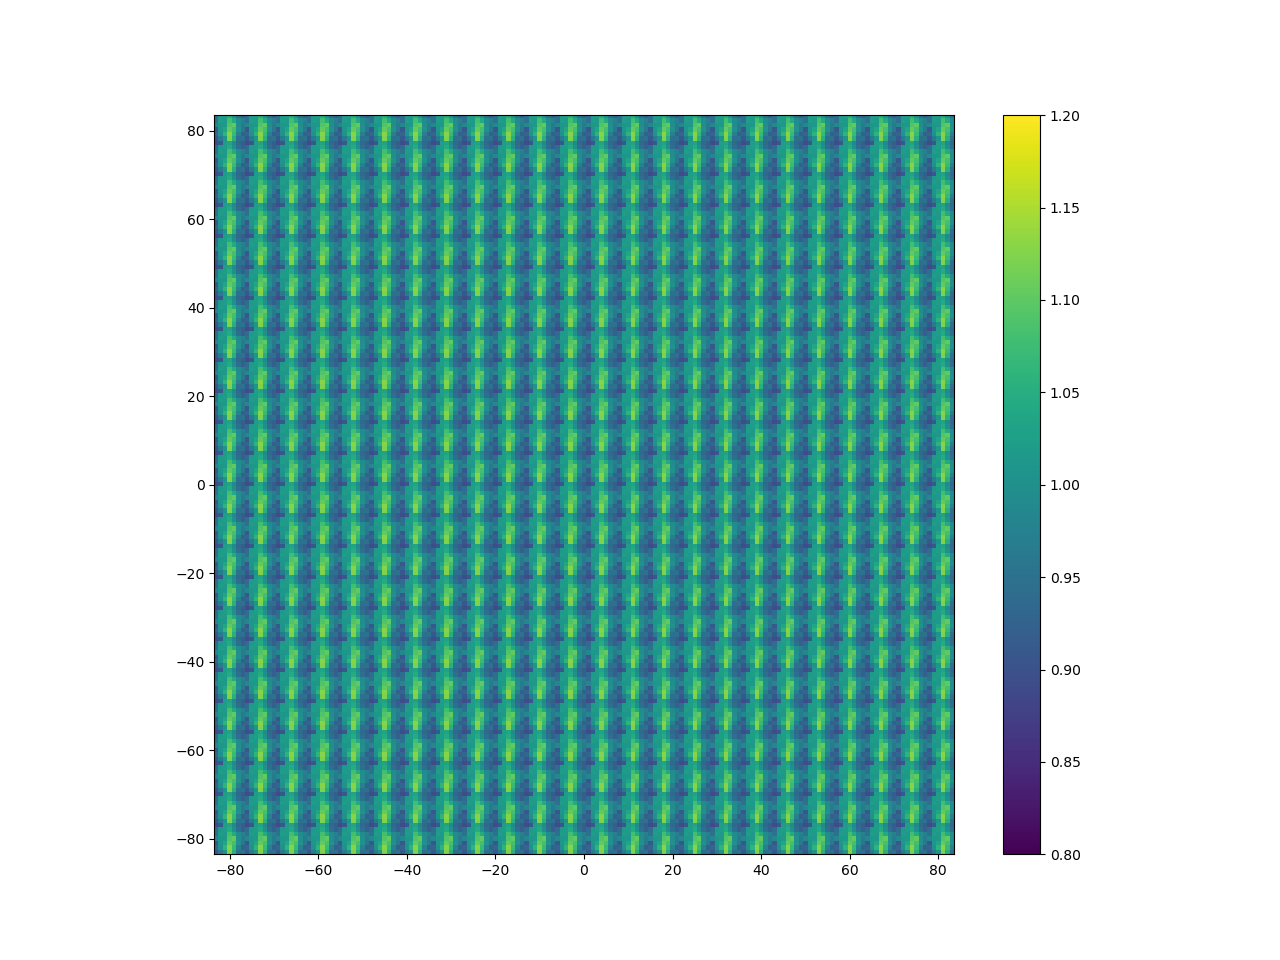

In [19]:
nBins = nDivisionsXY//2-1

def elem_function(i, j):

    i = np.mod(i.astype(int)+4,7)
    j = np.mod(j.astype(int)+4,7)

    result = np.array(wights_map_1cell)[i,j]/100 + 1

    return result

wights_map = np.fromfunction(elem_function, (nBins,nBins) )

plt.figure(figsize=(2*6.4, 2*4.8))
# plt.imshow(np.transpose(wights_map)[::-1,:], extent=(-sLength, sLength, -sLength, sLength))
plt.imshow(wights_map, extent=(-sLength, sLength, -sLength, sLength))

cbar = plt.colorbar()
plt.clim(0.8, 1.2)

Text(0, 0.5, 'y [mm]')

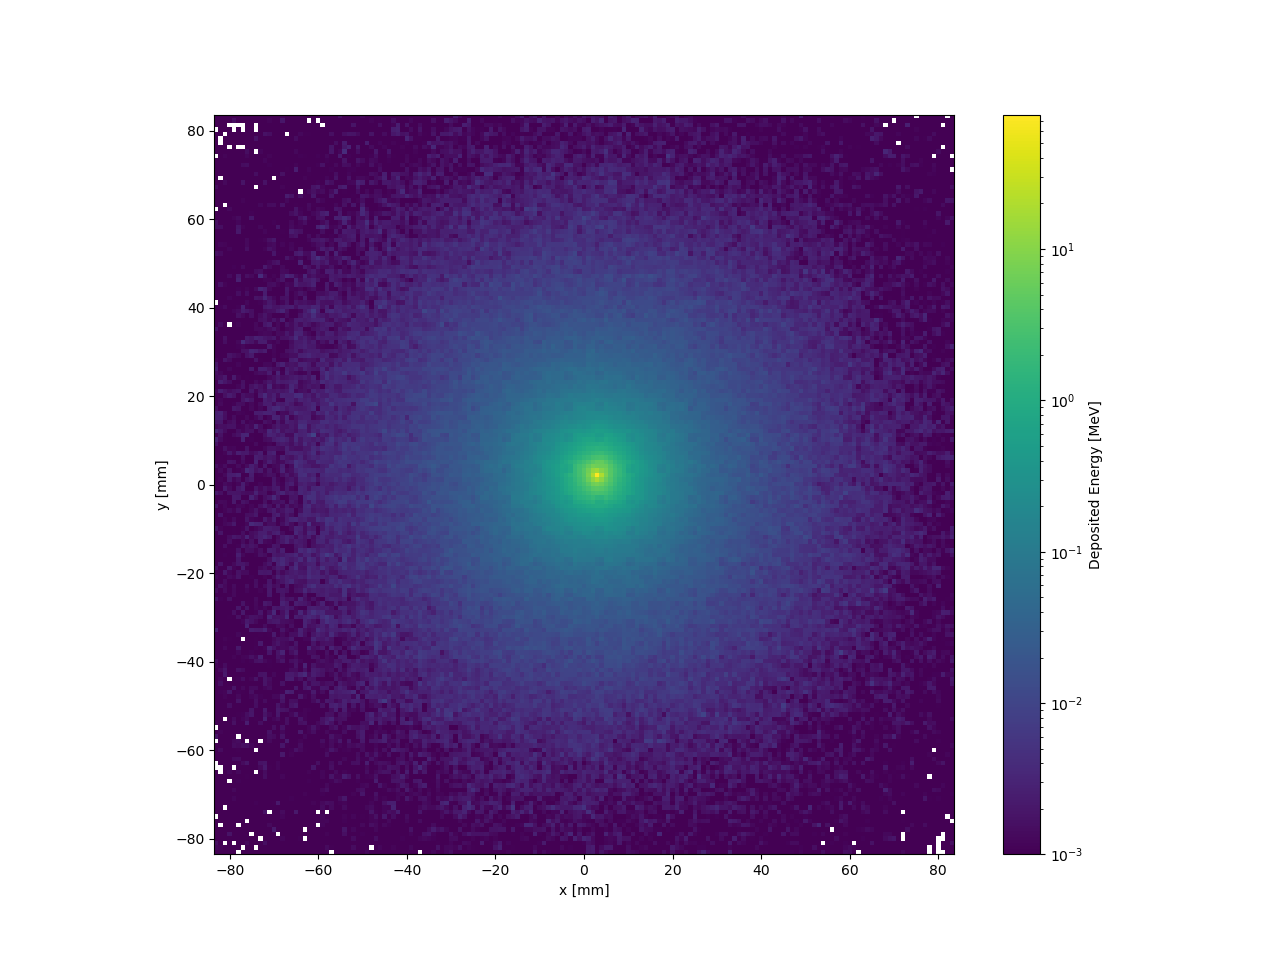

In [20]:
modulated = mesh*wights_map

plt.figure(figsize=(2*6.4, 2*4.8))
plt.imshow(np.transpose(modulated)[::-1,:], extent=(-sLength, sLength, -sLength, sLength), norm=colors.LogNorm(vmin=1e-3))
cbar = plt.colorbar()
cbar.ax.set_ylabel("Deposited Energy [MeV]")
plt.xlabel("x [mm]")
plt.ylabel("y [mm]")

In [21]:
from scipy.optimize import curve_fit 

def dispHistAndGauss(ax, data):

    # n_bins = int(np.sqrt(data.size))
    n_bins = 50
    bin_size = (np.max(data) - np.min(data))/n_bins

    histCounts, edges, _ = ax.hist(data, bins = n_bins)
    binCenters = (edges[1:] + edges[:-1])/2

    gaussFunc = lambda x, A, mu, sig: A*np.exp(-(x-mu)**2/sig**2/2)
    mu = np.mean(data)
    sig = np.std(data, ddof=1)
    A = data.size/(np.sqrt(2*np.pi)*sig)*bin_size
    p0 = (A, mu, sig)

    (A, mu, sig), _ = curve_fit(gaussFunc, binCenters, histCounts , p0=p0)

    x_gauss = np.linspace(np.min(data), np.max(data), 4*n_bins)
    y_gauss = gaussFunc(x_gauss, A, mu, sig)

    ax.plot(x_gauss, y_gauss, "r", label="$\sigma={:.2e}$\n$\mu={:.2e}$".format(sig, mu))
    ax.set_xlabel("$(\\tilde{E}_{ecs} - E_{ecs})/E_0$")
    ax.legend()

In [22]:
meanDetectedEdeps = {}
eDeps_modulated_dict = {}

def getMeshFromSymmetry(mesh, x, y):

    if np.abs(y) > np.abs(x):

        mesh = np.transpose(mesh, [0,2,1]) 
        # mesh = mesh[:,::-1,::-1]
        # I honestly do not understand why the line above must be commented
        # but it is not giving the correct map on debug test 
        # if it is not commented
        # TODO: understand why?

    if x < 0:
        mesh = mesh[:,::-1,:]

    if y < 0:
        mesh = mesh[:,:,::-1]

    return mesh


for i in range(7):
    for j in range(7):

        x = np.abs(i-3)
        y = np.abs(j-3)

        if y > x: x,y = y,x

        key = f"X={x},Y={y}"

        eDeps = meshs_dict[key]

        eDeps = getMeshFromSymmetry(eDeps, i-3, j-3)


        eDeps = np.sum(eDeps, axis=-1)
        eDeps = np.sum(eDeps, axis=-1)

        fig, (ax1, ax2) = plt.subplots(1,2,figsize=(2*6.4, 1*4.8))
        # ax1.hist(eDeps[eDeps > ENERGY*0.998], bins=40, label="$\mu = {:.4f}$ GeV".format( np.mean(eDeps)/1000 ))
        dispHistAndGauss(ax1, eDeps[eDeps > ENERGY*0.998])
        ax1.text(0.05, 0.1, "$\mu$ = {:.2f} GeV".format(np.mean(eDeps)/1000), transform=ax1.transAxes)

        ax1.set_title(f"Gamma {ENERGY} GeV. No modulated, X = {i-3}, Y = {j-3} mm")
        ax1.set_xlabel("Deposited energy [MeV]")
        ax1.legend()

        ####################################################################

        eDeps = meshs_dict[key]

        eDeps = getMeshFromSymmetry(eDeps, i-3, j-3)

        wights_map_exp_dim = np.expand_dims(wights_map, axis = 0)

        eDeps = eDeps*wights_map_exp_dim

        eDeps = np.sum(eDeps, axis=-1)
        eDeps = np.sum(eDeps, axis=-1)

        dispHistAndGauss(ax2, eDeps[eDeps > ENERGY*0.998])

        ax2.text(0.05, 0.1, "$\mu$ = {:.2f} GeV".format(np.mean(eDeps)/1000), transform=ax2.transAxes)

        ax2.set_title(f"Gamma {ENERGY} GeV. Modulated, X = {i-3}, Y = {j-3} mm")
        ax2.set_xlabel("Deposited energy [MeV]")
        ax2.legend()

        keyFull = f"X={i-3},Y={j-3}"

        meanDetectedEdeps[keyFull] = np.mean(eDeps)/1000

        eDeps_modulated_dict[keyFull] = eDeps

        fig.savefig("plots/"+keyFull+".png")
        plt.close()

In [23]:
efficiency_mesh = np.zeros( (7,7) )

eDep_uniform_source = np.array([])

for i in range(7):
    for j in range(7):

        x = i-3
        y = j-3

        key = f"X={x},Y={y}"

        efficiency_mesh[i][j] = meanDetectedEdeps[key]

        eDep_uniform_source = np.concatenate([eDep_uniform_source, eDeps_modulated_dict[key] ])

efficiency_mesh /= np.mean(efficiency_mesh)


# cast mesh to be in persent and substract 100% for better representation
efficiency_mesh = (efficiency_mesh-1)*100

Text(0, 0.5, 'y [mm]')

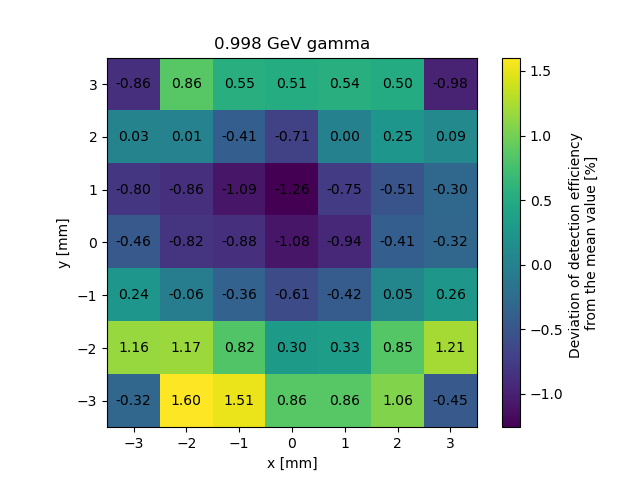

In [24]:
plt.figure(figsize=(6.4, 4.8))
plt.imshow(np.transpose(efficiency_mesh)[::-1,:], extent=(-3.5, 3.5, -3.5, 3.5))

for (j,i),label in np.ndenumerate(np.transpose(efficiency_mesh)[::-1,:]):
    
    plt.gca().text(i-3,3-j,"{:.2f}".format(label),ha='center',va='center')

cbar = plt.colorbar()
cbar.ax.set_ylabel("Deviation of detection efficiency \nfrom the mean value [%]")

plt.title(f"{ENERGY*0.998} GeV gamma")
plt.xlabel("x [mm]")
plt.ylabel("y [mm]")

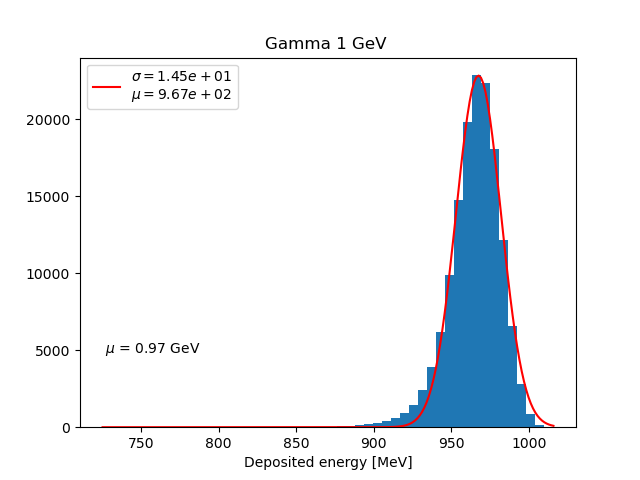

In [25]:
plt.figure()

ax = plt.gca()

dispHistAndGauss(ax, eDep_uniform_source[eDep_uniform_source > ENERGY*0.998])

ax.text(0.05, 0.2, "$\mu$ = {:.2f} GeV".format(np.mean(eDep_uniform_source)/1000), transform=ax.transAxes)

ax.set_title(f"Gamma {ENERGY} GeV ")
ax.set_xlabel("Deposited energy [MeV]")
ax.legend()

In [26]:
# TODO: find out why the map in the code above working withous A[:,::-1,::-1] step

A = np.array([[
    [0, 0, 0, 0, 2],
    [0, 0, 0, 3, 4],
    [0, 0, 5, 6, 7],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
]])

B = np.transpose(A[:,::-1,::-1], [0,2,1])

print(B)

[[[0 0 7 4 2]
  [0 0 6 3 0]
  [0 0 5 0 0]
  [0 0 0 0 0]
  [0 0 0 0 0]]]
